# How to Tell a Story Using Data

## Project description
We decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we decide to try to attract investors. We'll analyze current market conditions. Will we be able to maintain success when the novelty of robot waiters wears off?

---

**Main goal**: We'll prepare market research. We have <b>open-source</b> data on restaurants in LA.

---

## Analysis structure: 
1. [**Download the data and prepare it for analysis**](#step_1)
2. [**Data analysis:**](#step_2)

 - [Investigation of the proportions of the various types of establishments.](#step_2_1)
 - [Investigation of the proportions of chain and nonchain establishments. ](#step_2_2)
 - [Which type of establishment is typically a chain?](#step_2_3)
 - [What characterizes chains?](#step_2_4)
 - [Average number of seats for each type of restaurant.](#step_2_5)
 - [Street names extraction.](#step_2_6)
 - [Top ten streets by number of restaurants.](#step_2_7)
 - [Number of streets that only have one restaurant.](#step_2_8)
 - [Distribution of the number of seats for streets with a lot of restaurants.](#step_2_9)
 
 
3. [**General conclusions**](#step_3)
4. [**Link to the presentation.**](#step_4) 

Let's install additional library to parse USA addresses to seperate instances (AddressNumber, StreetNamePreDirectional, StreetName, StreetNamePostType).

In [1]:
!pip3 install usaddress

     |████████████████████████████████| 63 kB 862 kB/s eta 0:00:011
     |████████████████████████████████| 186 kB 3.2 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats as st
import plotly.express as px
import usaddress
from plotly import graph_objects as go

## <a id=step_1>Step 1. Download the data and prepare it for analysis</a>

In [3]:
data = pd.read_csv('../dataset/rest_data_us.csv')

In [4]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In the **'data'** table we have data on restaurants in LA.
In the 'data' table, we have 6 columns and 9651 values in each column. We have missing values and wrong data type only in the 'chain' column, we will process it below. Rest data looks good and ready for further analysis.

In [6]:
data['chain'].value_counts()

False    5972
True     3676
Name: chain, dtype: int64

Let's look at missing values in the 'chain' column. 

In [7]:
data_missing = data[data['chain'].isnull()]
data_missing

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


We have only 3 restaurants where the chain is not defined. We checked those restaurants manually on the internet and find out that all of them are not a chain. So we will fill missing values with **False** for these restaurants.

In [8]:
# Let's fill missing values with False. 
data['chain'].fillna(False, inplace = True)

In [9]:
data['chain'].value_counts()

False    5975
True     3676
Name: chain, dtype: int64

In [10]:
data['chain'].dtypes

dtype('bool')

Now we don't have missing values in the 'chain' column and the type is correct - **bool**. 
We have 3676 restaurants that part of the chains and 5975 that are not part of the chain.

In [11]:
# Let's check how many unique ids we have.
data['id'].nunique()

9651

We don't have duplicates in our data. 'id' contains only unique ids. 


### Conclusion for Step 1
    
- In the **'data'** table we have data on restaurants in LA.
- In the 'data' table, we have **6** columns and **9651** values in each column. 
- We filled missing values, where the chain is not defined. We checked those restaurants manually on the internet and find out that all of them are not a chain, fill missing values with False for these restaurants. We have **3676** restaurants that part of the chains and **5975** that are not part of the chain. 
- We don't have duplicates in our data. 'id' column contains 9651 unique ids.



## <a id=step_2>Step 2. Data analysis</a>

<a id=step_2_1>- Investigation of the proportions of the various types of establishments.</a>

In [11]:
# Let's calculate the number and percentage of different establishments.
establishments = data['object_type'].value_counts().reset_index()
establishments.columns = ['object_type', 'number']
establishments['percent'] = establishments['number'] / 9651 * 100
establishments

,object_type,number,percent
0,Restaurant,7255,75.173557
1,Fast Food,1066,11.045488
2,Cafe,435,4.507305
3,Pizza,320,3.315719
4,Bar,292,3.025593
5,Bakery,283,2.932339


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


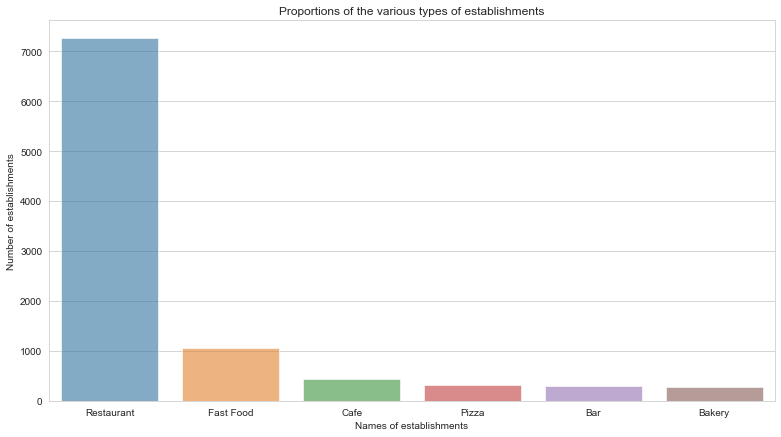

In [12]:
# Let's plot the graph. 
plt.figure(figsize=(13,7))
sns.set_style("whitegrid")
ax = sns.barplot(establishments['object_type'], establishments['number'], alpha=.6)
ax.set_title('Proportions of the various types of establishments')
ax.set_xlabel('Names of establishments')
ax.set_ylabel('Number of establishments')
plt.show()

### Conclusion:
We can see that **7,255** establishments in LA are of a restaurant type, which is **75%** of all establishments. Second, the most popular establishments are Fast Food, 11% of all. The least popular is the bakery, only 3% of all establishments.

<a id=step_2_2>- Investigation of the proportions of chain and nonchain establishments.</a>

In [13]:
# Let's calculate the number and percentage of chain and not chain establishments. 
chain = data['chain'].value_counts().reset_index()
chain.columns = ['chain', 'number']
chain['percent'] = chain['number'] / 9651 * 100
chain

,chain,number,percent
0,False,5975,61.910683
1,True,3676,38.089317


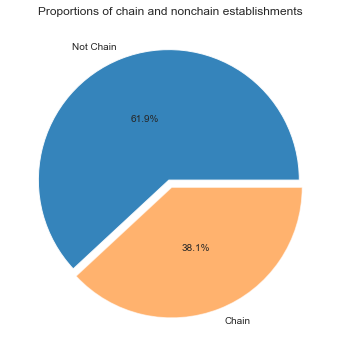

In [14]:
# Let's plot the graph. 
pie, ax = plt.subplots(figsize=[10,6])
n = plt.pie(x=chain['percent'], autopct="%.1f%%", explode=[0.03]*2, labels=['Not Chain', 'Chain'], pctdistance=0.5)
n[0][0].set_alpha(0.9)
n[0][1].set_alpha(0.6)
plt.title("Proportions of chain and nonchain establishments")
plt.show()

### Conclusion:
In the LA market Not Chain establishments share is **62%**, Chain establishments - **38%**.

<a id=step_2_3>- The type of establishment that is typically a chain.</a>

In [15]:
# Let's group by 'object type' and 'chain' and calculate how many establishments for chain and for not a chain.
establishment_chain = data.pivot_table(index = ['object_type', 'chain'], values = 'id', aggfunc = 'count').reset_index()
establishment_chain

,object_type,chain,id
0,Bakery,True,283
1,Bar,False,215
2,Bar,True,77
3,Cafe,False,169
4,Cafe,True,266
5,Fast Food,False,461
6,Fast Food,True,605
7,Pizza,False,167
8,Pizza,True,153
9,Restaurant,False,4963


In [16]:
# Let's calculate how many establishments each 'object_type'.
number_by_type = data.groupby('object_type').agg({'id': 'count'}).reset_index()
number_by_type

,object_type,id
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


In [17]:
# Let's calculate the percentage for chain and not chain from the total establishment for each 'object_type'. 
establishment_chain = establishment_chain.merge(number_by_type, on = 'object_type')
establishment_chain.columns = ['object_type', 'chain', 'number', 'total']
establishment_chain['percentage'] = establishment_chain['number'] / establishment_chain['total'] * 100
establishment_chain.sort_values('percentage', inplace=True)
establishment_chain

,object_type,chain,number,total,percentage
2,Bar,True,77,292,26.369863
10,Restaurant,True,2292,7255,31.592006
3,Cafe,False,169,435,38.850575
5,Fast Food,False,461,1066,43.245779
8,Pizza,True,153,320,47.812500
7,Pizza,False,167,320,52.187500
6,Fast Food,True,605,1066,56.754221
4,Cafe,True,266,435,61.149425
9,Restaurant,False,4963,7255,68.407994
1,Bar,False,215,292,73.630137


In [18]:
# Let's apply the function to create a new column where we will store chain/not chain instead of True/False.
establishment_chain['chain_not_chain'] = establishment_chain['chain'].map(lambda x: 'chain' if x else 'not chain')
establishment_chain

,object_type,chain,number,total,percentage,chain_not_chain
2,Bar,True,77,292,26.369863,chain
10,Restaurant,True,2292,7255,31.592006,chain
3,Cafe,False,169,435,38.850575,not chain
5,Fast Food,False,461,1066,43.245779,not chain
8,Pizza,True,153,320,47.812500,chain
7,Pizza,False,167,320,52.187500,not chain
6,Fast Food,True,605,1066,56.754221,chain
4,Cafe,True,266,435,61.149425,chain
9,Restaurant,False,4963,7255,68.407994,not chain
1,Bar,False,215,292,73.630137,not chain


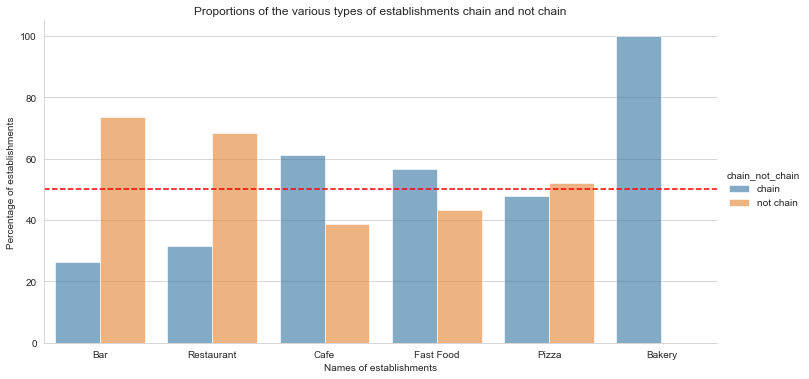

In [19]:
# Let's plot the graph. 
sns.set_style("whitegrid")
fig = sns.catplot(data= establishment_chain , kind="bar", x="object_type", y = "percentage", 
                  hue="chain_not_chain", height=5, aspect=2, alpha=.6)
plt.axhline(50, ls='--', color='r')
plt.title('Proportions of the various types of establishments chain and not chain')
plt.xlabel('Names of establishments')
plt.ylabel('Percentage of establishments')
plt.show()

### Conclusions:

We add a horizontal line **50%** to better visualization equality for chain and not a chain. On the graph, Pizza establishments located the most closer to line 50% this means that Pizzas chain places and Pizzas not chain places occur in the data almost equally often (48% and 52% respectively). 

In our data appears only Bakeries that are part of chains.

**Cafes and Fast Foods** most often are **chains**.

**Bars and Restaurants** most often are **not part of the chain**. 

- For **Bars and Restaurants** concept and the atmosphere is very important. Clients ready to spend a lot of time and money there. So for these kinds of establishments, the chain is not the first option. 
The uniqueness and originality of individual ideas make Bars and Restaurants more often not chains.
- **Cafes and Fast Foods** most often used for a quick and cheap snack. Design, uniqueness, and comfort are not so important to customers. The main goal is fast and cheap. Therefore, the sameness, recognition (as a certificate of quality) is the best choice for Cafe and Fast Food. In the Cafes and  Fast Food chains, the client knows exactly what he will receive and how much it will cost, which makes the network the best choice for these types of establishments.
- **Bakeries** normally sell a standard set of products, there is nothing unusual in this type of establishment. Therefore, standardization as part of the chain is the best option for Bakery.

<a id=step_2_4>- What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?</a>

In [20]:
# Let's look just at establishments that are a chain.
chain_only = data[data['chain'] == True]
print('Mode: ', chain_only['number'].mode()[0])
print('Median: ', chain_only['number'].median())
chain_only.head()

Mode:  12
Median:  25.0


,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


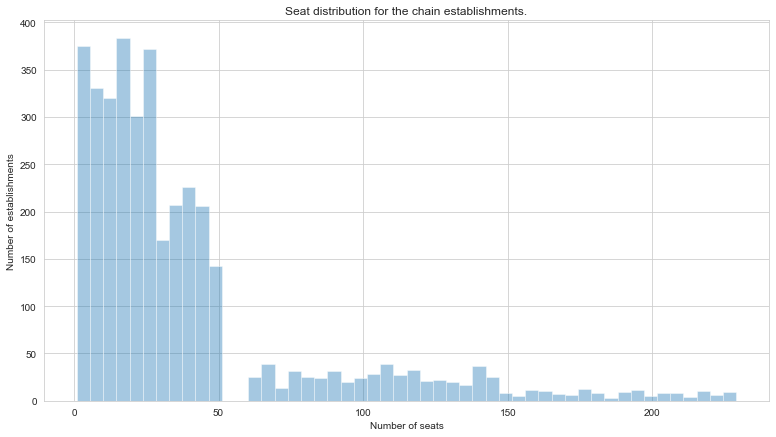

In [21]:
# Let's plot the graph. 
sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
fig = sns.distplot(chain_only['number'], kde=False)
plt.title('Seat distribution for the chain establishments.')
plt.xlabel('Number of seats')
plt.ylabel('Number of establishments')
plt.show()

### Conclusion:

From the graph, we can see that most often chain establishments have **12 seats**. Most chain restaurants have less than **50 seats**. 
Chains characterized many establishments with a small number of seats.

<a id=step_2_5> - Determination of the average number of seats for each type of restaurant. </a>

<a id=step_2_5> - On average, which type of restaurant has the greatest number of seats?</a>

In [22]:
# Let's calculate the mean number of seats.
establishment_seats = data.groupby(by = 'object_type').agg({'number': 'mean'})
establishment_seats.reset_index(inplace = True)
establishment_seats.columns = ['object_type', 'mean']
establishment_seats.sort_values(by = 'mean', inplace = True)
establishment_seats

,object_type,mean
0,Bakery,21.773852
2,Cafe,25.000000
4,Pizza,28.459375
3,Fast Food,31.837711
1,Bar,44.767123
5,Restaurant,48.042316


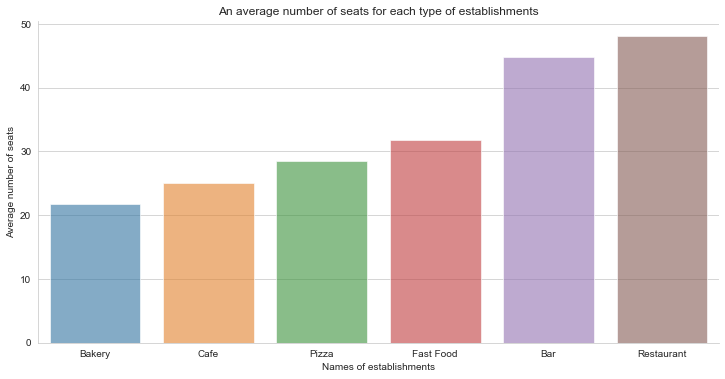

In [23]:
# Let's plot the graph. 
fig = sns.catplot(data=  establishment_seats, kind="bar", x="object_type", y = "mean", height=5, aspect=2, alpha=.6)
plt.title('An average number of seats for each type of establishments')
plt.xlabel('Names of establishments')
plt.ylabel('Average number of seats')
plt.show()

### Conclusion:

On average, **Restaurant** type of establishments has the greatest number of seats (near 48 seats). Bars also have a pretty big number of seats.
**Bakeries** have the lowest number of seats on average (near 22 seats). 

- The difference in the average number of seats can be explained by the **type** of establishments and by the **time**, that clients are ready to spend inside.
- In Bars and Restaurant clients normally spent more time than in Cafes and Fast Food, so they need more place to seat. In Bakery people normally spend really less time, often they do takeaway, so this type of establishment does not need a lot of seats. 
- For the robot-waiter restaurant, we would recommend choosing a number of seats that are close to the average.

<a id=step_2_6>- Putting the data on street names from the address column in a separate column.</a>

In [24]:
# Let's look at the address example.
street_ex = data['address'][0]
street_ex

'3708 N EAGLE ROCK BLVD'

In [25]:
# Let's parse using usaddress library. 
usaddress.parse(street_ex)

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [26]:
# Let's define a function that will collect street names. 
def extract_address(address):
    result = []
    for i in usaddress.parse(address):
        if i[1] == 'StreetName' or i[1] == 'StreetNamePostType':
            result.append(i[0])
    return ' '.join(result)

In [27]:
# Let's check the function with our address example.
extract_address(street_ex)

'EAGLE ROCK BLVD'

In [28]:
# Let's apply the function to our data.
data['street'] = data['address'].map(extract_address)
print('Number of streets:', data['street'].nunique())
data.head()

Number of streets: 555


,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


In our data, we have **555** streets. 

<a id=step_2_7>- Plotting a graph of the top ten streets by number of restaurants.</a>

In [29]:
# Let's group by streets and select the top 10 streets with the biggest number of restaurants.
streets_count = data.groupby(by = 'street').agg({'id': 'count'})
streets_count.reset_index(inplace = True)
streets_count.columns = ['street', 'number']
streets_count.sort_values(by = 'number', ascending = False, inplace = True)
top_10_streets = streets_count.head(10)
print('A number of restaurants on top 10 streets:', top_10_streets['number'].sum())
print('Percentage of all restaurants:', round((top_10_streets['number'].sum()) / 9651 * 100, 2))

A number of restaurants on top 10 streets: 3242
Percentage of all restaurants: 33.59


In total at top 10 streets located 3242 establishments. This is **33.6%** of all restaurants in LA.

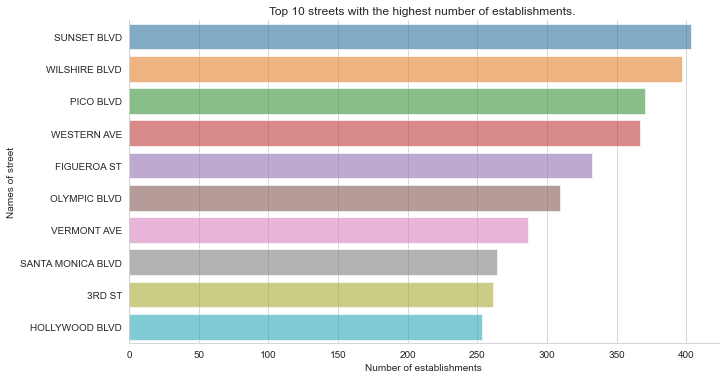

In [32]:
# Let's plot the graph. 
fig = sns.catplot(data=top_10_streets, kind="bar", x="number", y = "street", height=5, aspect=2, alpha=.6)
plt.title('Top 10 streets with the highest number of establishments. ')
plt.ylabel('Names of street')
plt.xlabel('Number of establishments')
plt.show()

### Conclusion:

From the graph, we can see the top 10 streets that contain more than **253** and up to **403** establishments.
The most popular for the restaurants located at **Sunset Blvd** and Wilshire Blvd.
Hollywood Blvd is the least popular of the top 10 restaurants streets.

 <a id=step_2_8>- Number of streets that only have one restaurant.</a>

In [33]:
# Let's group by streets and select streets with 1 restaurant.
streets_1 = streets_count[streets_count['number'] == 1]
print(streets_1.head())
streets_1.shape

          street  number
417    PORTIA ST       1
418  PRODUCE ROW       1
58       98TH ST       1
459       SPRING       1
416    PORTER ST       1


(250, 2)

**250** streets have only one restaurant.
45% of the streets have 1 establishment, 55% of the streets have more than one restaurant. 

This can be explained by the different locations of streets in the city (center or residential area), the population of the streets, and the size of the street. We know from life experience that there are always hundreds of restaurants on the central streets, boulevards, and promenades of large cities, while there may be very few establishments on small, unpopular streets.


 <a id=step_2_9>- For streets with a lot of restaurants, look at the distribution of the number of seats.</a>

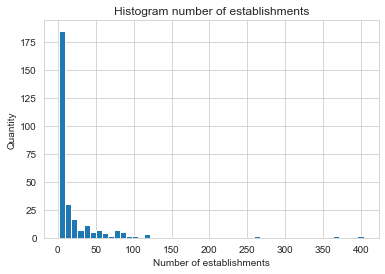

In [34]:
# Let's look at the histogram number of establishments on tha street.
streets_count[streets_count['number'] > 1].hist(bins=50)
plt.title('Histogram number of establishments')
plt.xlabel('Number of establishments')
plt.ylabel('Quantity')
plt.show()

From Histogram, let's make an assumption that streets have a lot of restaurants if on this street located more than **100** establishments.  

In [35]:
# Let's look at streets that have more than 100 establishments.
streets_100 = streets_count[streets_count['number'] > 100]
streets_100.head()

,street,number
476,SUNSET BLVD,403
538,WILSHIRE BLVD,397
412,PICO BLVD,370
524,WESTERN AVE,367
212,FIGUEROA ST,332


In [36]:
# From the 'data' table let's extract only data for streets that have more than 100 restaurants.
data_100 = data[np.isin(data['street'], list(streets_100['street']))]
data_100.head()

,id,object_name,address,chain,object_type,number,street
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,SUNSET BLVD
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100,WORLD WAY
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7,6TH ST


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


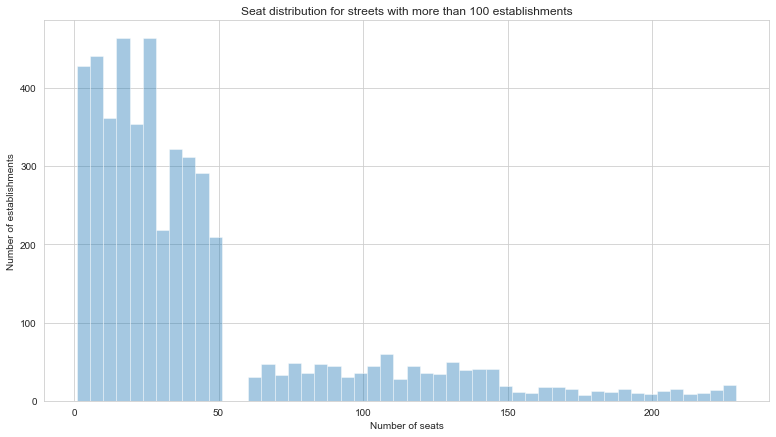

In [37]:
# Let's plot the graph. 
sns.set_style("whitegrid")
fig = plt.figure(figsize=(13,7))
sns.distplot(data_100['number'], kde = False)
plt.title('Seat distribution for streets with more than 100 establishments')
plt.xlabel('Number of seats')
plt.ylabel('Number of establishments')
plt.show()

### Conclusion:
Seats distribution for the streets that has more than 100 restaurants looks very similar with seats distribution for chain establishments. So let's compare Seats distribution for all restaurants at all streets and restaurants in the top 100 streets. 

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


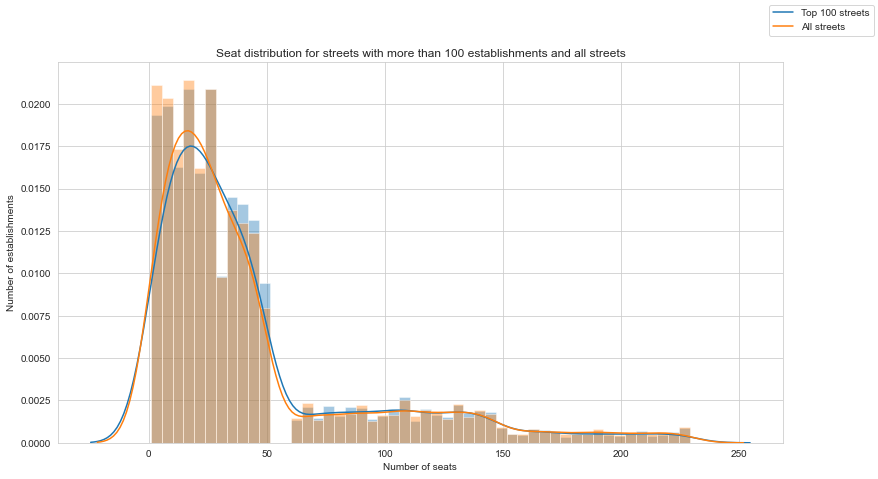

In [38]:
# Let's plot the graph. 
sns.set_style("whitegrid")
fig = plt.figure(figsize=(13,7))
sns.distplot(data_100['number'])
sns.distplot(data['number'])
fig.legend(labels=['Top 100 streets','All streets'])
plt.title('Seat distribution for streets with more than 100 establishments and all streets')
plt.xlabel('Number of seats')
plt.ylabel('Number of establishments')
plt.show()

### Conclusion:

Seats distribution for all restaurants at all streets and restaurants in the top 100 streets looks almost the same. Most of the restaurants have **less than 50 seats**. 

---

### <a id=step_3> Overall conclusions:</a>

- We analyzed data on restaurants in LA on 555 streets. In the 'date' table, we have 6 columns and 9651 values in each column. 


- We calculated that  **7,255** establishments in LA are of a restaurant type, which is **75%** of all establishments. The least popular is the bakery, only 3% of all establishments. In the LA market Not Chain establishments share is **62%**, Chain establishments - **38%**. We find out that Cafes and Fast Foods most often are chains, but Bars and Restaurants most often are not part of the chain.


- Most often chain establishments have 12 seats. On average, **Restaurant** type of establishments has the greatest number of seats (near 48 seats). **Bakeries** have the lowest number of seats on average (near 22 seats). 


- In total at the top 10 streets located 3242 establishments. This is **33.6%** of all restaurants in LA. The most popular for the restaurants located at **Sunset Blvd** (403 establishments) and Wilshire Blvd. 45% of the streets have 1 establishment, 55% of the streets have more than one restaurant. 

### Recommendations:
- Considering the newness and originality of the idea of robot-waiter establishments and the market situation in LA we would recommend giving **first priority to restaurants**, not cafes (cafes most often are part of the chain and crowded out by corporations). We recommend opting for a restaurant with a **small number of seats near 40-50**.  As a location, we would consider one of that **top 10 streets**, where located  34% of all establishments in LA. 

### <a id=step_4>Link to the presentation:</a>
https://drive.google.com/file/d/1JoPTWtVgBuJ7ez4gwoGPJV8CJNw7Lovo/view?usp=sharing
